# TEXT SUMMARIZATION USING NLP
## What is Text Summarization
Text Summarization is the process of distilling the most important information from a source text.

### Why automatic text summerization


*   Summaries reduce reading time
*   When researching documents, summaries make the selection process easier.
*   Automatic summerization improves the effectiveness of indexing.
*   Automatic summerization algorithms are less biased then human summarizers.
*   Personalized summaries are useful in question-answering system as they provide personalized information.
*   Using automatic or semi-automatic summerization system enables commercial abstract services to-increase the number of text documents they are able to process.

### Type of Summerization

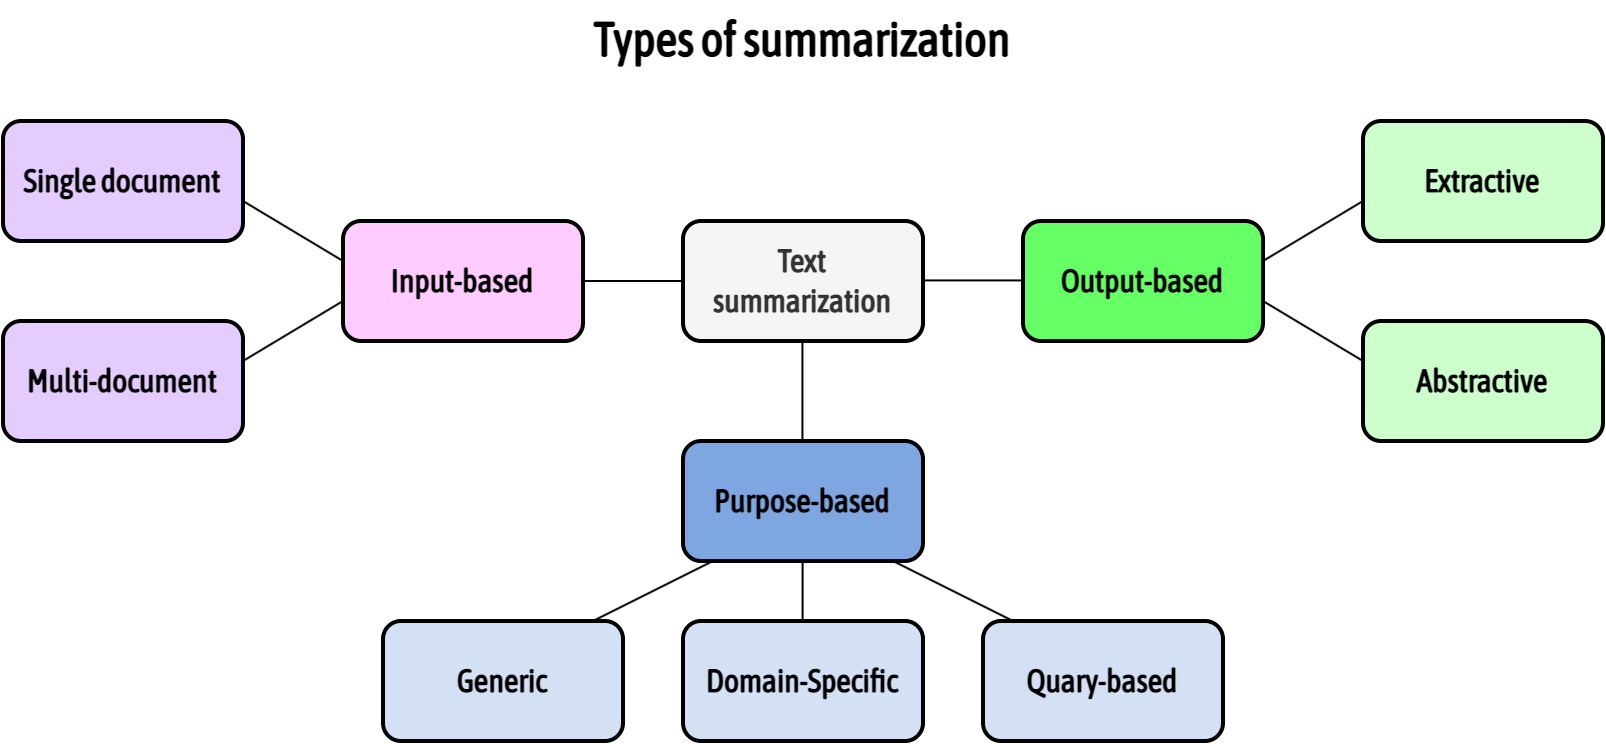

### How to do Text Summerization
*   Text Cleaning
*   Sentence Tokenization
*   Word Tokenization
*   Word-frequency table
*   Summerization

# Extractive Text Summarization with SpaCy

## Data Preparation

### Text Data Definition

In [160]:
text = """There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.

An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary."""

## Library Imports and Setup

### Importing Libraries

In [161]:
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

### Defining Stopwords

In [162]:
stopwords = list(STOP_WORDS)
stopwords[:20]

['therefore',
 'it',
 "'ll",
 'moreover',
 'that',
 'as',
 'being',
 'indeed',
 'both',
 'forty',
 'them',
 're',
 'amongst',
 'through',
 'otherwise',
 'yet',
 'himself',
 'who',
 '‘m',
 'his']

## Text Processing with SpaCy

### Loading the SpaCy Model

In [163]:
nlp = spacy.load('en_core_web_sm')

### Processing the Text

In [164]:
doc = nlp(text)

### Tokenization

In [165]:
tokens = [token.text for token in doc]
tokens[:20] #There are stopwords in the tokens like ; are, of ...

['There',
 'are',
 'broadly',
 'two',
 'types',
 'of',
 'extractive',
 'summarization',
 'tasks',
 'depending',
 'on',
 'what',
 'the',
 'summarization',
 'program',
 'focuses',
 'on',
 '.',
 'The',
 'first']

## Word Frequency Analysis

### Extending Stopwords List

In [166]:
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [196]:
for i, word in enumerate(doc):
  if i < 20:
    print(f"{word.text:<20}:{word.text.lower():<20}")

There               :there               
are                 :are                 
broadly             :broadly             
two                 :two                 
types               :types               
of                  :of                  
extractive          :extractive          
summarization       :summarization       
tasks               :tasks               
depending           :depending           
on                  :on                  
what                :what                
the                 :the                 
summarization       :summarization       
program             :program             
focuses             :focuses             
on                  :on                  
.                   :.                   
The                 :the                 
first               :first               


### Calculating Word Frequencies

In [168]:
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1

In [169]:
word_frequencies

{'broadly': 1,
 'types': 1,
 'extractive': 1,
 'summarization': 8,
 'tasks': 1,
 'depending': 2,
 'program': 1,
 'focuses': 2,
 'generic': 3,
 'obtaining': 1,
 'summary': 3,
 'abstract': 2,
 'collection': 1,
 'documents': 2,
 'sets': 1,
 'images': 1,
 'videos': 1,
 'news': 4,
 'stories': 1,
 'etc': 1,
 'second': 1,
 'query': 4,
 'relevant': 2,
 'called': 2,
 'based': 1,
 'summarizes': 1,
 'objects': 1,
 'specific': 1,
 'Summarization': 1,
 'systems': 1,
 'able': 1,
 'create': 1,
 'text': 1,
 'summaries': 2,
 'machine': 1,
 'generated': 1,
 'user': 1,
 'needs': 1,
 '\n\n': 1,
 'example': 2,
 'problem': 2,
 'document': 4,
 'attempts': 1,
 'automatically': 2,
 'produce': 1,
 'given': 2,
 'interested': 1,
 'generating': 1,
 'single': 1,
 'source': 2,
 'use': 1,
 'multiple': 1,
 'cluster': 1,
 'articles': 3,
 'topic': 2,
 'multi': 1,
 'related': 1,
 'application': 1,
 'summarizing': 1,
 'Imagine': 1,
 'system': 1,
 'pulls': 1,
 'web': 1,
 'concisely': 1,
 'represents': 1,
 'latest': 1}

### Normalizing Word Frequencies

In [170]:
max_frequency = max(word_frequencies.values())
max_frequency

8

In [171]:
for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max_frequency

In [172]:
word_frequencies

{'broadly': 0.125,
 'types': 0.125,
 'extractive': 0.125,
 'summarization': 1.0,
 'tasks': 0.125,
 'depending': 0.25,
 'program': 0.125,
 'focuses': 0.25,
 'generic': 0.375,
 'obtaining': 0.125,
 'summary': 0.375,
 'abstract': 0.25,
 'collection': 0.125,
 'documents': 0.25,
 'sets': 0.125,
 'images': 0.125,
 'videos': 0.125,
 'news': 0.5,
 'stories': 0.125,
 'etc': 0.125,
 'second': 0.125,
 'query': 0.5,
 'relevant': 0.25,
 'called': 0.25,
 'based': 0.125,
 'summarizes': 0.125,
 'objects': 0.125,
 'specific': 0.125,
 'Summarization': 0.125,
 'systems': 0.125,
 'able': 0.125,
 'create': 0.125,
 'text': 0.125,
 'summaries': 0.25,
 'machine': 0.125,
 'generated': 0.125,
 'user': 0.125,
 'needs': 0.125,
 '\n\n': 0.125,
 'example': 0.25,
 'problem': 0.25,
 'document': 0.5,
 'attempts': 0.125,
 'automatically': 0.25,
 'produce': 0.125,
 'given': 0.25,
 'interested': 0.125,
 'generating': 0.125,
 'single': 0.125,
 'source': 0.25,
 'use': 0.125,
 'multiple': 0.125,
 'cluster': 0.125,
 'article

## Sentence Scoring and Summary Generation

### Sentence Tokenization

In [173]:
sentence_tokens = [sent for sent in doc.sents]
sentence_tokens

[There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
 ,
 An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.,
 Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic).,
 This problem is called multi-document summarization.,
 A related appli

### Calculating Sentence Scores

In [174]:
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_scores.keys():
        sentence_scores[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_scores[sent] += word_frequencies[word.text.lower()]

In [175]:
sentence_scores

{There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on.: 3.125,
 The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.).: 4.25,
 The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.: 4.625,
 Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.
 : 4.0,
 An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.: 4.5,
 Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic).: 3.25,
 This problem is called multi-docum

### Selecting Top Sentences for Summary

In [176]:
from heapq import nlargest

In [177]:
select_length = int(len(sentence_tokens)*0.3)
select_length

2

In [178]:
summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
summary

[The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.,
 An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.]

### Generating the Final Summary

In [179]:
final_summary = [word.text for word in summary]
final_summary

['The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query.',
 'An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.']

In [180]:
summary = ' '.join(final_summary)
summary

'The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document.'

## Evaluation

### Displaying the Original Text and the Summary

In [181]:
text

'There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.\n\nAn example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is sum

In [182]:
len(text), len(summary)

(1175, 273)